In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

In [110]:
df = pd.read_csv('./dataset/hour.csv')
print(df.shape)
df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [112]:
df.isnull().sum().sum()

0

In [113]:
data = df.drop(columns=['instant','dteday','casual','registered','yr','atemp'])
data.shape

(17379, 11)

In [114]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1


In [115]:
data.columns=['season','month','hour','holiday','weekday','working','weathersit','temp','humidity','windspeed','count']

In [116]:
data.head()

,season,month,hour,holiday,weekday,working,weathersit,temp,humidity,windspeed,count
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1


In [117]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.000,3.0000,4.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.000,5.0000,6.0000
working,17379.0,0.682721,0.465431,0.00,0.0000,1.000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.500,0.6600,1.0000
humidity,17379.0,0.627229,0.192930,0.00,0.4800,0.630,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.194,0.2537,0.8507


In [118]:
categorical_cols = ['season','month','holiday','weekday','working','weathersit','hour']
numerical_cols = ['temp','humidity','windspeed','count']

In [119]:
data.duplicated().sum()

2

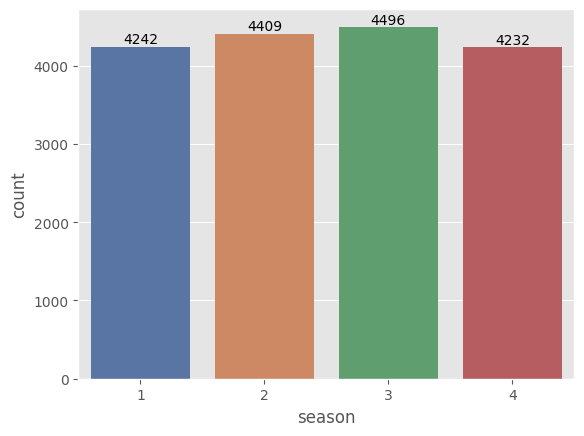

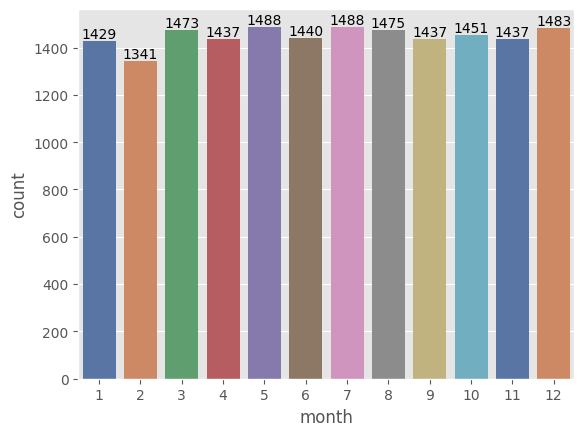

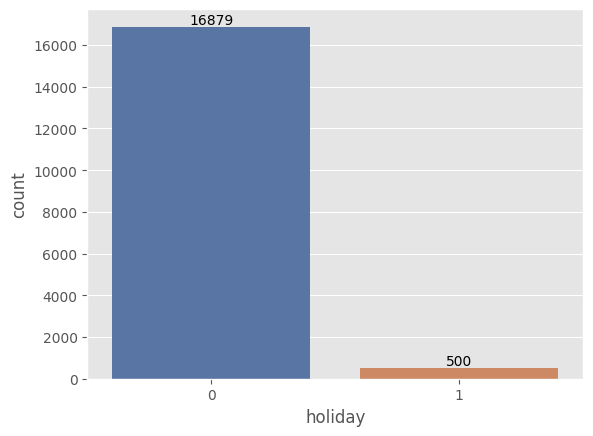

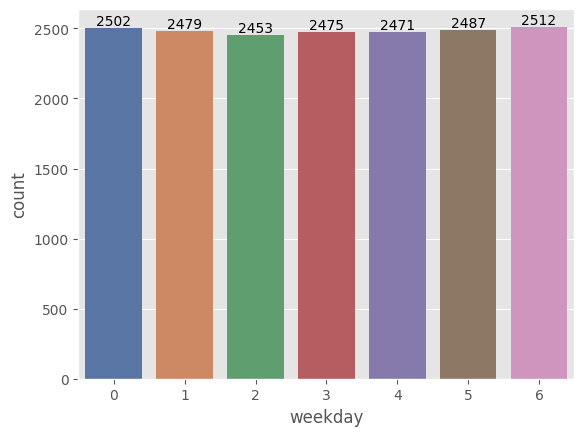

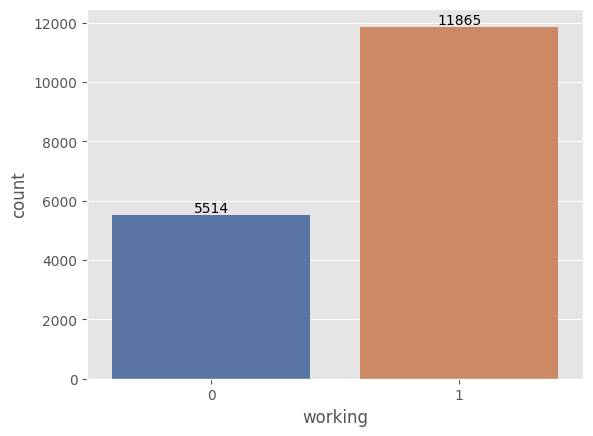

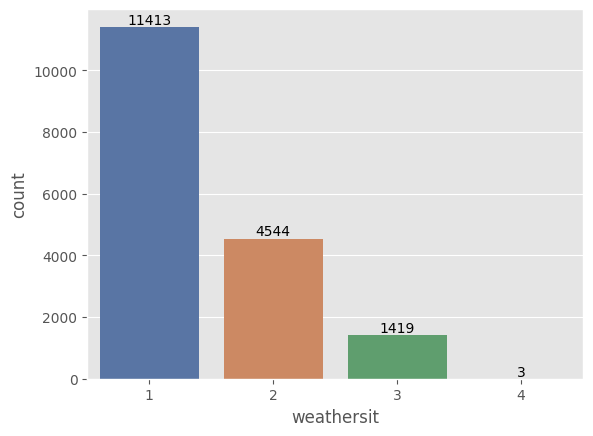

In [120]:
for i in categorical_cols[:-1]:
    ax = sns.countplot(data=data, x = i,palette='deep')
    ax.bar_label(ax.containers[0])
    plt.show()

### Groupby

In [121]:
data.apply(lambda x: x.nunique())

season          4
month          12
hour           24
holiday         2
weekday         7
working         2
weathersit      4
temp           50
humidity       89
windspeed      30
count         869
dtype: int64

In [122]:
data.groupby(by=['season','working'])['count'].agg('sum')

season  working
1       0          137683
        1          333665
2       0          287976
        1          630613
3       0          312056
        1          749073
4       0          262554
        1          579059
Name: count, dtype: int64

In [123]:
data.groupby(by=['season','weathersit'])['count'].agg('sum')

season  weathersit
1       1             325278
        2             124205
        3              21642
        4                223
2       1             664463
        2             207363
        3              46763
3       1             801941
        2             212932
        3              46256
4       1             546491
        2             251452
        3              43670
Name: count, dtype: int64

In [124]:
data.groupby(by=['working','weathersit'])['count'].agg('sum')

working  weathersit
0        1              747219
         2              211982
         3               41045
         4                  23
1        1             1590954
         2              583970
         3              117286
         4                 200
Name: count, dtype: int64

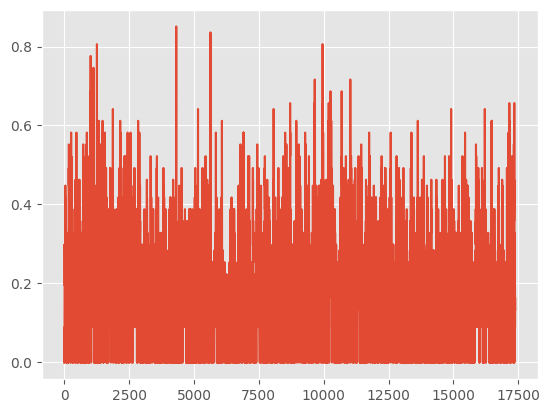

In [125]:
plt.plot(data['windspeed'])

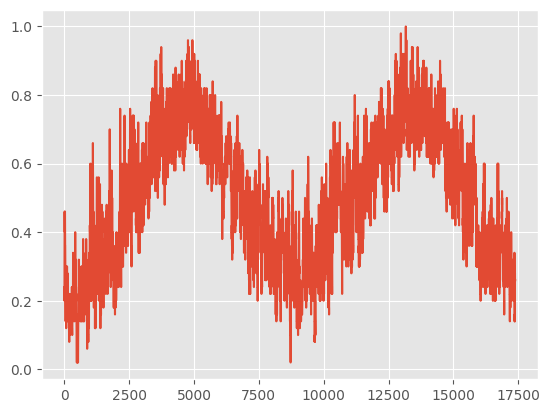

In [126]:
plt.plot(data['temp'])

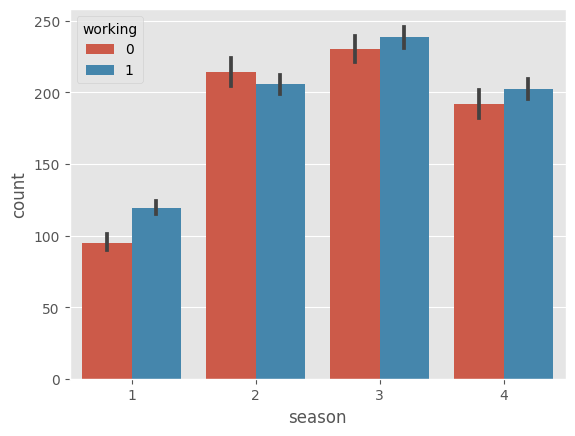

In [127]:
ax = sns.barplot(data=data,x='season',y='count',hue='working')
plt.show()

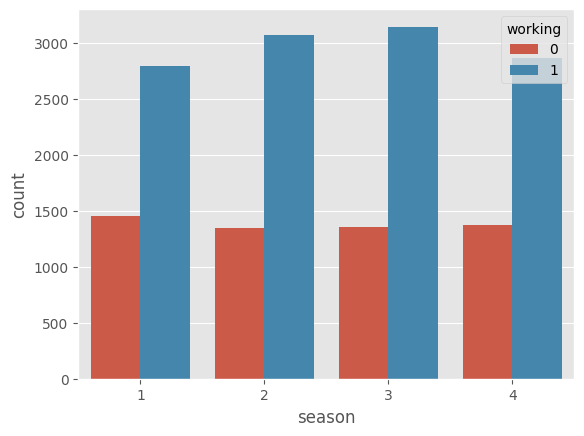

In [128]:
ax = sns.countplot(data=data,x='season',hue='working')
plt.show()

### Boxplot

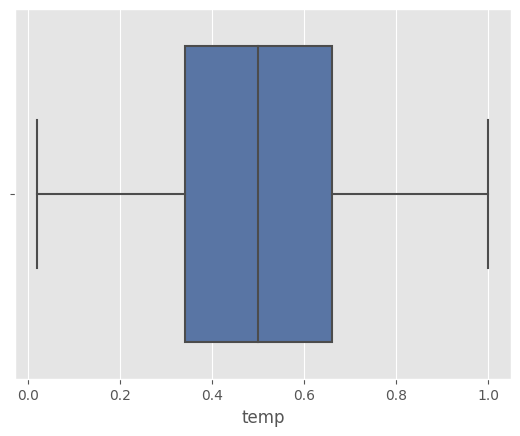

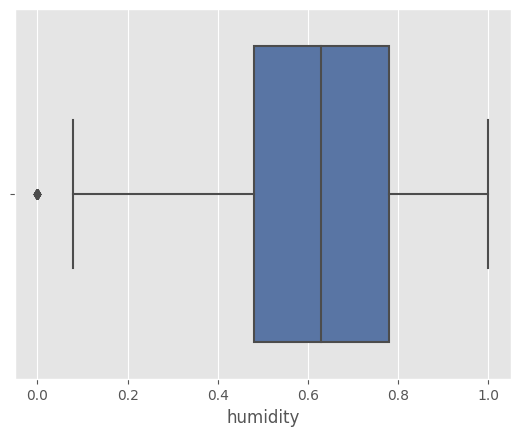

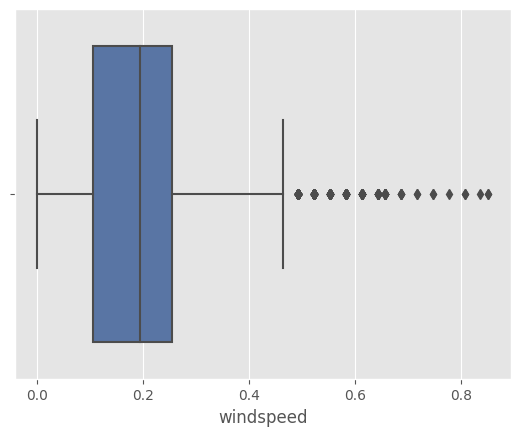

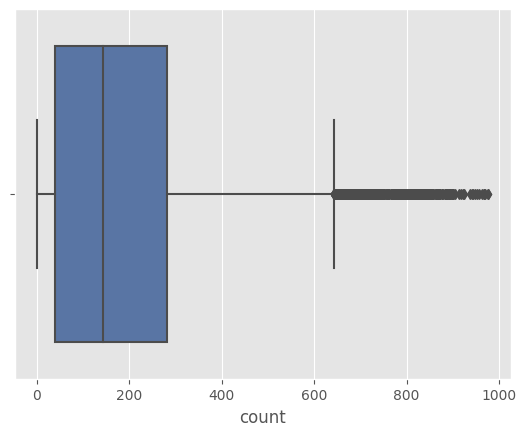

In [129]:
for i in numerical_cols:
    ax = sns.boxplot(data=data, x = i,palette='deep')
    plt.show()

<AxesSubplot: xlabel='count'>

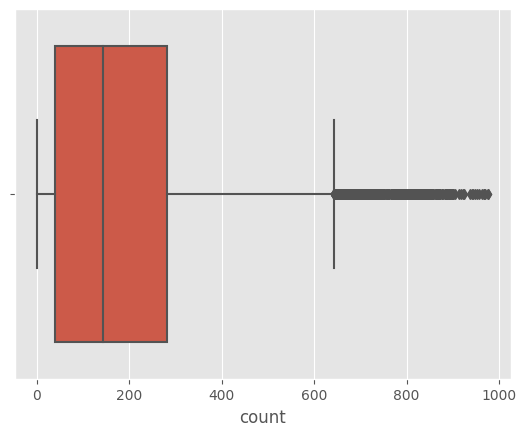

In [130]:
sns.boxplot(data=data,x='count')

### Skewness and kurtosis

In [131]:
data.skew()

season       -0.005416
month        -0.009253
hour         -0.010680
holiday       5.638538
weekday      -0.002998
working      -0.785258
weathersit    1.228047
temp         -0.006021
humidity     -0.111287
windspeed     0.574905
count         1.277412
dtype: float64

In [132]:
data.kurt()

season        -1.334251
month         -1.201878
hour          -1.198021
holiday       29.796540
weekday       -1.255997
working       -1.383529
weathersit     0.350151
temp          -0.941844
humidity      -0.826117
windspeed      0.590820
count          1.417203
dtype: float64

In [133]:
data[data['count']>281]

,season,month,hour,holiday,weekday,working,weathersit,temp,humidity,windspeed,count
1070,1,2,8,0,4,1,1,0.32,0.57,0.0896,285
1103,1,2,17,0,5,1,1,0.66,0.34,0.3582,327
1305,1,2,14,0,0,0,1,0.44,0.47,0.0896,282
1634,1,3,15,0,0,0,1,0.48,0.39,0.3284,304
1673,1,3,8,0,2,1,1,0.26,0.70,0.0896,282
...,...,...,...,...,...,...,...,...,...,...,...
17110,4,12,17,0,4,1,2,0.34,0.66,0.1940,475
17111,4,12,18,0,4,1,2,0.34,0.71,0.1940,381
17125,1,12,8,0,5,1,2,0.32,0.57,0.2836,472
17134,1,12,17,0,5,1,2,0.26,0.56,0.3284,321


### Correlation

<AxesSubplot: >

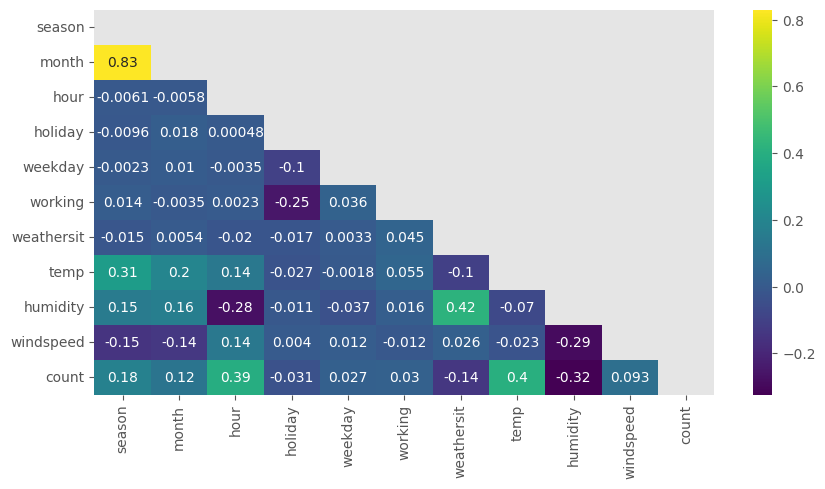

In [134]:
plt.figure(figsize=(10,5))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap='viridis', annot=True,mask=mask)

#### Season and Month

In [135]:
data.groupby(by=['season','month'])['count'].agg('sum')

season  month
1       1        134933
        2        151352
        3        142065
        12        42998
2       3         86855
        4        269094
        5        331686
        6        230954
3       6        115388
        7        344948
        8        351194
        9        249599
4       9         96392
        10       322352
        11       254831
        12       168038
Name: count, dtype: int64

In [136]:
data[['month','season','count']].corr()

,month,season,count
month,1.000000,0.830386,0.120638
season,0.830386,1.000000,0.178056
count,0.120638,0.178056,1.000000


##### need to drop season column

In [137]:
data = data.drop(columns='season')
data

,month,hour,holiday,weekday,working,weathersit,temp,humidity,windspeed,count
0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [138]:
categorical_cols

['season', 'month', 'holiday', 'weekday', 'working', 'weathersit', 'hour']

In [139]:
categorical_cols.pop(0)

'season'

In [140]:
print(categorical_cols)
print(numerical_cols)

['month', 'holiday', 'weekday', 'working', 'weathersit', 'hour']
['temp', 'humidity', 'windspeed', 'count']


In [141]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=25)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((12165, 9), (5214, 9), (12165,), (5214,))

In [144]:
import xgboost as xgb

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [145]:
cv_ = KFold(n_splits=10,shuffle=True)

In [146]:
def cross_val_models(X, y, cv, scoring='neg_mean_squared_error',n_jobs=-1):
    xgb = XGBRegressor()
    xgb_scores = cross_val_score(xgb, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for XGBRegressor: ", xgb_scores)
    print()
    print("RMSE Cross validation score for XGBRegressor: ", np.sqrt(-np.mean(xgb_scores)))
    print("\n\n")

    #catb = CatBoostRegressor()
    #catb_scores = cross_val_score(catb, X, y, cv=cv, scoring=scoring)
    #print("Cross validation score for CATBoostRegressor: ", catb_scores)
    #print()
    #print("RMSE Cross validation score for CATBoostRegressor: ", np.sqrt(-np.mean(catb_scores)))
    #print("\n\n")

    rf = RandomForestRegressor()
    rf_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for RandomForestRegressor: ", rf_scores)
    print()
    print("RMSE Cross validation score for RandomForestRegressor: ", np.sqrt(-np.mean(rf_scores)))
    print("\n\n")

    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for LinearRegression: ", lr_scores)
    print()
    print("RMSE Cross validation score for LinearRegression: ", np.sqrt(-np.mean(lr_scores)))
    print("\n\n")

    svm = SVR()
    svm_scores = cross_val_score(svm, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for SVR: ", svm_scores)
    print()
    print("RMSE Cross validation score for SVR: ", np.sqrt(-np.mean(svm_scores)))
    print("\n\n")
    



In [147]:
cross_val_models(X, y, cv=KFold(n_splits=10,shuffle=True,random_state=42), scoring='neg_mean_squared_error',n_jobs=-1)

Cross validation score for XGBRegressor:  [-3619.13546492 -4149.92502921 -3777.58565105 -4170.5805415
 -4116.26074183 -4576.30320934 -4091.93984216 -4211.65565248
 -4503.55876901 -4189.6515091 ]

RMSE Cross validation score for XGBRegressor:  64.34795755157289



Cross validation score for RandomForestRegressor:  [-4128.23886459 -4542.32588896 -4191.08514395 -4607.90491441
 -4171.35213487 -5028.05771831 -4572.50353235 -4729.13014663
 -5372.9431099  -4845.05280686]

RMSE Cross validation score for RandomForestRegressor:  67.96219115127845



Cross validation score for LinearRegression:  [-20412.20456008 -21300.36501427 -20754.94070182 -22082.01660096
 -22531.90793029 -21601.13185329 -21171.72393364 -23958.3404189
 -24308.27356081 -21056.59013908]

RMSE Cross validation score for LinearRegression:  148.04644362940894



Cross validation score for SVR:  [-19193.31724409 -20706.90012759 -19664.92883274 -20896.56608402
 -20829.9101967  -19982.59745075 -21469.71149414 -23697.60010857
 -23798

In [148]:
def cross_val_models(X, y, cv, scoring='r2',n_jobs=-1):
    xgb = XGBRegressor()
    xgb_scores = cross_val_score(xgb, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for XGBRegressor: ", xgb_scores)
    print()
    print("RMSE Cross validation score for XGBRegressor: ", np.mean(xgb_scores))
    print("\n\n")
    
    #catb = CatBoostRegressor()
    #catb_scores = cross_val_score(catb, X, y, cv=cv, scoring=scoring)
    #print("Cross validation score for CATBoostRegressor: ", catb_scores)
    #print()
    #print("RMSE Cross validation score for CATBoostRegressor: ", np.sqrt(-np.mean(catb_scores)))
    #print("\n\n")

    rf = RandomForestRegressor()
    rf_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for RandomForestRegressor: ", rf_scores)
    print()
    print("RMSE Cross validation score for RandomForestRegressor: ", np.mean(rf_scores))
    print("\n\n")

    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for LinearRegression: ", lr_scores)
    print()
    print("RMSE Cross validation score for LinearRegression: ", np.mean(lr_scores))
    print("\n\n")

    svm = SVR()
    svm_scores = cross_val_score(svm, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for SVR: ", svm_scores)
    print()
    print("RMSE Cross validation score for SVR: ", np.mean(svm_scores))
    print("\n\n")
    


In [149]:
cross_val_models(X, y, cv=KFold(n_splits=10,shuffle=True,random_state=42),n_jobs=-1)

Cross validation score for XGBRegressor:  [0.88292799 0.87197212 0.879852   0.87389737 0.87356113 0.85437029
 0.87802676 0.88104084 0.87251033 0.87198539]

RMSE Cross validation score for XGBRegressor:  0.8740144210927021



Cross validation score for RandomForestRegressor:  [0.86337242 0.86043403 0.86522366 0.8620834  0.8702784  0.84145165
 0.86459393 0.86421625 0.84750154 0.85271247]

RMSE Cross validation score for RandomForestRegressor:  0.8591867741584578



Cross validation score for LinearRegression:  [0.33970477 0.34286991 0.33987874 0.33232307 0.30788907 0.31259654
 0.36890965 0.3232913  0.31186559 0.35661687]

RMSE Cross validation score for LinearRegression:  0.3335945500600425



Cross validation score for SVR:  [0.37913341 0.36117868 0.37454711 0.36816662 0.36016921 0.36410246
 0.36002718 0.33065597 0.32629487 0.36833575]

RMSE Cross validation score for SVR:  0.3592611262425674





### Hyperparameter Tuning of XGBRegressor using OPTUNA

In [150]:
import optuna

In [151]:
def objectives(n_trial):

    params ={
        'objective': 'reg:squarederror',
        "n_estimators" : n_trial.suggest_int("n_estimators",100,400),
        "booster" : n_trial.suggest_categorical("booster", ['gbtree','gblinear','dart']),
        "learning_rate" : n_trial.suggest_float("learning_rate",1e-4,0.1,log=True),
        "max_depth" : n_trial.suggest_int("max_depth",5,15),
        "subsample" : n_trial.suggest_float('subsample',0.5,1.0),
        'reg_alpha': n_trial.suggest_int('reg_alpha', 1, 10),
        'reg_lambda': n_trial.suggest_int('reg_lambda', 1, 5),
        'gamma' : n_trial.suggest_float('gamma',0.01, 20.0),
        'min_child_weight': n_trial.suggest_int('min_child_weight', 1, 10),
        'random_state': n_trial.suggest_categorical('random_state', [2020]),
        'n_jobs' : -1,
        'verbose':0

    }

    dtrain = xgb.DMatrix(data = X_train, label = y_train)
    dval = xgb.DMatrix(data = X_test, label = y_test)

    
    regressor = xgb.train(params, dtrain,verbose_eval=False) 
    y_pred = regressor.predict(dval)
    mse = mean_squared_error(y_test, y_pred)

    return mse

 ##### Add a callback for pruning. This is for Classification
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(test_y, pred_labels)

In [152]:
study = optuna.create_study(direction="minimize",pruner=optuna.pruners.MedianPruner(n_startup_trials=50, n_warmup_steps=25))
study.optimize(objectives, n_trials=700,show_progress_bar=True)


[I 2023-01-15 20:11:09,368] A new study created in memory with name: no-name-503ba2bf-80be-476e-b703-5773688b7920
C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\optuna\progress_bar.py:49: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/700 [00:00<?, ?it/s]

[20:11:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "verbose" } are not used.

[I 2023-01-15 20:11:09,546] Trial 0 finished with value: 67586.00079324839 and parameters: {'n_estimators': 354, 'booster': 'dart', 'learning_rate': 0.0005098264267446006, 'max_depth': 13, 'subsample': 0.7093404057781677, 'reg_alpha': 9, 'reg_lambda': 5, 'gamma': 9.195105798944983, 'min_child_weight': 9, 'random_state': 2020}. Best is trial 0 with value: 67586.00079324839.
[20:11:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "verbose" } are not used.

[I 2023-01-15 20:11:09,612] Trial 1 finished with value: 68047.1008276098 and parameters: {'n_estimators': 287, 'booster': 'gbtree', 'learning_rate': 0.00010836057049328364, 'max_depth': 9, 'subsamp

In [153]:
study.best_value

13549.613333427285

In [154]:
print(f"Optimized MSE: {study.best_value:.4f}")
print()
print(f"Optimized RMSE: {np.sqrt(study.best_value):.4f}")
print()
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Optimized MSE: 13549.6133

Optimized RMSE: 116.4028

Best params:
	n_estimators: 167
	booster: dart
	learning_rate: 0.09999000329285813
	max_depth: 11
	subsample: 0.9703448679440511
	reg_alpha: 10
	reg_lambda: 1
	gamma: 0.8086147976944716
	min_child_weight: 3
	random_state: 2020


In [155]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_booster,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_random_state,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,67586.000793,2023-01-15 20:11:09.435731,2023-01-15 20:11:09.545432,0 days 00:00:00.109701,dart,9.195106,0.000510,13,9,354,2020,9,5,0.709340,COMPLETE
1,1,68047.100828,2023-01-15 20:11:09.548433,2023-01-15 20:11:09.611049,0 days 00:00:00.062616,gbtree,19.979604,0.000108,9,4,287,2020,4,1,0.824561,COMPLETE
2,2,45187.095008,2023-01-15 20:11:09.613049,2023-01-15 20:11:09.683154,0 days 00:00:00.070105,gbtree,10.337136,0.023660,11,5,385,2020,4,2,0.689966,COMPLETE
3,3,32479.709425,2023-01-15 20:11:09.685159,2023-01-15 20:11:09.701155,0 days 00:00:00.015996,gblinear,14.663657,0.029175,12,10,322,2020,2,1,0.534019,COMPLETE
4,4,67955.312913,2023-01-15 20:11:09.702154,2023-01-15 20:11:09.750155,0 days 00:00:00.048001,gbtree,3.011353,0.000190,8,10,161,2020,2,3,0.575775,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,18165.427099,2023-01-15 20:12:38.248039,2023-01-15 20:12:38.394560,0 days 00:00:00.146521,dart,0.386229,0.079209,11,4,147,2020,10,1,0.949092,COMPLETE
696,696,29541.608643,2023-01-15 20:12:38.396665,2023-01-15 20:12:38.483647,0 days 00:00:00.086982,gblinear,1.759430,0.063496,11,4,159,2020,10,1,0.927877,COMPLETE
697,697,15994.194561,2023-01-15 20:12:38.486644,2023-01-15 20:12:38.635669,0 days 00:00:00.149025,dart,0.926207,0.088037,11,4,151,2020,9,1,0.960350,COMPLETE
698,698,13609.007971,2023-01-15 20:12:38.638677,2023-01-15 20:12:38.795232,0 days 00:00:00.156555,dart,1.292226,0.099739,11,4,163,2020,4,1,0.976496,COMPLETE


In [156]:
from optuna.visualization import plot_param_importances

C:\Users\Asus\AppData\Local\Temp\ipykernel_12452\199994575.py:2: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



<AxesSubplot: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

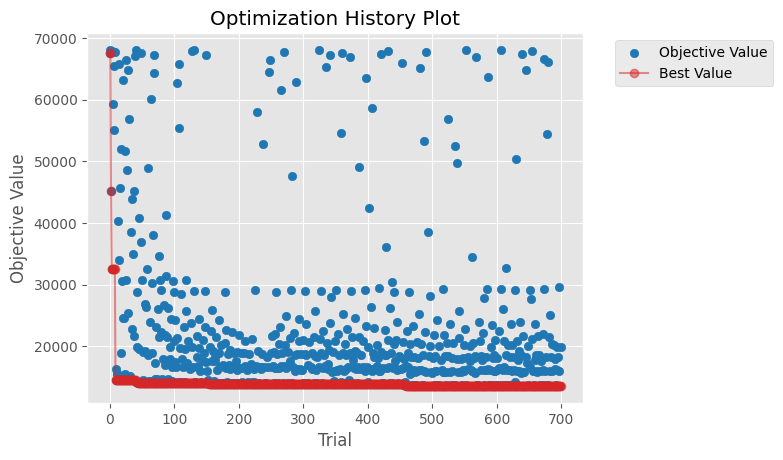

In [157]:
from optuna.visualization.matplotlib import plot_optimization_history
plot_optimization_history(study)

In [158]:
plot_param_importances(study)

In [159]:
optuna.visualization.plot_edf(study)

In [160]:
optuna.visualization.plot_slice(study)

In [161]:
params = study.best_params

In [162]:
params

{'n_estimators': 167,
 'booster': 'dart',
 'learning_rate': 0.09999000329285813,
 'max_depth': 11,
 'subsample': 0.9703448679440511,
 'reg_alpha': 10,
 'reg_lambda': 1,
 'gamma': 0.8086147976944716,
 'min_child_weight': 3,
 'random_state': 2020}

In [163]:
model = XGBRegressor(**params)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.8086147976944716, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09999000329285813, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=167, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2020, ...)

In [164]:
print(r2_score(y_test, model.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

0.871561660835741
64.92144053194431


In [165]:
print(r2_score(y_train, model.predict(X_train)))
print(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

0.9948770710017933
12.989368404372991


### visualising the overfitting and underfitting and finding the best estimators

from sklearn.model_selection import validation_curve
param_range = np.arange(10, 250, 2)

# train_scores, test_scores = validation_curve(xg_reg_base,
#                                   X, y, param_name="n_estimators", param_range=param_range,
#                                   cv=cv_shuffle, scoring="neg_root_mean_squared_error", n_jobs=-1)
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
train_scores = [ ]
test_scores = [ ]
for i in param_range:
    xg_reg = xgb.XGBRegressor(**study.best_params)
    
    xg_reg.fit(X_train,y_train)
    train_scores.append(np.sqrt(mean_squared_error(y_train,xg_reg.predict(X_train))))
    test_scores.append(np.sqrt(mean_squared_error(y_test,xg_reg.predict(X_test))))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_scores, label="Training score", color="black")
plt.plot(param_range, test_scores, label="Cross-validation score", color="dimgrey")

# plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
# plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.show()

In [166]:
xgb_regressor = xgb.XGBRegressor(**study.best_params)
xgb_regressor_base = xgb.XGBRegressor()

In [167]:
xgb_regressor = xgb.XGBRegressor(**study.best_params)
xgb_regressor_base.fit(X_train,y_train)
score1 = xgb_regressor_base.score(X_test,y_test)
xgb_regressor.fit(X_train,y_train)
score2 = xgb_regressor.score(X_test,y_test)
print(f"R2 score withouth tuning:{score1} ,R2 score with tuning:{score2}")

R2 score withouth tuning:0.8665616169601688 ,R2 score with tuning:0.871561660835741


### cross_val_score with hyperparameters

def objective(trial):

    criterion = trial.suggest_categorical("booster", ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    rf = RandomForestRegressor(criterion =criterion,
            max_depth=max_depth, 
            n_estimators=n_estimators,n_jobs=-1
        )

    score = cross_val_score(rf, X, y, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15)


trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

___
___
___

# CatBoost

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'D:\Project\bike_analysis\bike-rental-analysis\dataset\hour.csv')
data.shape   

(17379, 17)

In [2]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.drop(columns=['casual','registered','dteday','instant'],inplace=True)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
X = data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [6]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

In [8]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
9229,1,1,1,11,0,3,1,2,0.30,0.2727,0.61,0.2985
8534,1,0,12,8,0,2,1,2,0.30,0.3030,0.65,0.1642
1468,1,0,3,12,0,0,0,2,0.46,0.4545,0.94,0.3284
14388,3,1,8,17,0,1,1,1,0.80,0.7273,0.46,0.2239
1826,2,0,3,20,0,1,1,1,0.56,0.5303,0.64,0.1940


In [9]:
import xgboost as xgb

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


from catboost import CatBoostRegressor

In [10]:
clf=CatBoostRegressor()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score(y_test,y_pred)

Learning rate set to 0.062057
0:	learn: 174.0803010	total: 143ms	remaining: 2m 22s
1:	learn: 167.7899062	total: 146ms	remaining: 1m 12s
2:	learn: 161.4339962	total: 151ms	remaining: 50.3s
3:	learn: 155.7819147	total: 156ms	remaining: 38.8s
4:	learn: 150.8954979	total: 158ms	remaining: 31.5s
5:	learn: 146.1489180	total: 161ms	remaining: 26.6s
6:	learn: 141.6766429	total: 163ms	remaining: 23.1s
7:	learn: 137.7976890	total: 165ms	remaining: 20.5s
8:	learn: 134.1952031	total: 167ms	remaining: 18.4s
9:	learn: 130.9010347	total: 169ms	remaining: 16.7s
10:	learn: 127.6163745	total: 171ms	remaining: 15.3s
11:	learn: 123.5548314	total: 172ms	remaining: 14.2s
12:	learn: 120.7576452	total: 174ms	remaining: 13.2s
13:	learn: 117.9941007	total: 176ms	remaining: 12.4s
14:	learn: 115.4143686	total: 177ms	remaining: 11.6s
15:	learn: 112.9798530	total: 179ms	remaining: 11s
16:	learn: 110.5228926	total: 181ms	remaining: 10.4s
17:	learn: 108.3298057	total: 182ms	remaining: 9.95s
18:	learn: 106.7486919	tot

0.9509970253023757

In [11]:
scores = cross_val_score(clf,X,y,cv=KFold(n_splits=10,shuffle=True),n_jobs=-1)
np.mean(scores)

0.9531207500368735

In [12]:
y_pred1 = clf.predict(X_train)
r2_score(y_train,y_pred1)

0.9678401965387291

In [13]:
np.sqrt(mean_squared_error(y_test,y_pred))

40.437426401674045

In [14]:
data.drop(columns=['atemp'],inplace=True)

In [15]:
data[['season','yr','mnth','hr','weekday','workingday','weathersit','holiday']]= data[['season','yr','mnth','hr','weekday','workingday','weathersit','holiday']].astype('O')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  object 
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  object 
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 1.6+ MB


In [17]:
categorical_cols =  list(data.select_dtypes(include=['object']).columns)
categorical_cols


['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

In [18]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
9229,1,1,1,11,0,3,1,2,0.30,0.2727,0.61,0.2985
8534,1,0,12,8,0,2,1,2,0.30,0.3030,0.65,0.1642
1468,1,0,3,12,0,0,0,2,0.46,0.4545,0.94,0.3284
14388,3,1,8,17,0,1,1,1,0.80,0.7273,0.46,0.2239
1826,2,0,3,20,0,1,1,1,0.56,0.5303,0.64,0.1940


In [19]:
from catboost import CatBoostRegressor
clf = CatBoostRegressor(
    iterations=1000,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=categorical_cols
)

Learning rate set to 0.062057
0:	learn: 173.9611175	total: 39.6ms	remaining: 39.6s
1:	learn: 167.3203127	total: 67.1ms	remaining: 33.5s
2:	learn: 161.2266966	total: 92.3ms	remaining: 30.7s
3:	learn: 155.5501506	total: 118ms	remaining: 29.3s
4:	learn: 150.2802477	total: 140ms	remaining: 27.8s
5:	learn: 145.3617857	total: 164ms	remaining: 27.2s
6:	learn: 140.7388961	total: 187ms	remaining: 26.5s
7:	learn: 136.4963332	total: 211ms	remaining: 26.1s
8:	learn: 132.6807692	total: 235ms	remaining: 25.9s
9:	learn: 129.0542953	total: 258ms	remaining: 25.6s
10:	learn: 125.8652326	total: 282ms	remaining: 25.3s
11:	learn: 122.7636084	total: 306ms	remaining: 25.2s
12:	learn: 120.0430684	total: 330ms	remaining: 25.1s
13:	learn: 117.6202890	total: 354ms	remaining: 24.9s
14:	learn: 115.1771448	total: 376ms	remaining: 24.7s
15:	learn: 111.9094311	total: 401ms	remaining: 24.6s
16:	learn: 109.1049602	total: 423ms	remaining: 24.5s
17:	learn: 106.3821482	total: 446ms	remaining: 24.3s
18:	learn: 103.7444567	

In [20]:
y_pred2 = clf.predict(X_test)

In [21]:
r2_score(y_test,y_pred2)

0.9396531498658781

In [22]:
y_pred2_train = clf.predict(X_train)
r2_score(y_train,y_pred2_train)

0.9535695590481634

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred2))

44.87449648949171

In [24]:
clf.get_params()

{'iterations': 1000, 'loss_function': 'RMSE'}

In [28]:
clf = CatBoostRegressor(
    loss_function = 'RMSE',
    iterations=1000, 
    #learning_rate=0.001
)


clf.fit(X_train, y_train, 
        cat_features=categorical_cols, 
        eval_set=(X_test, y_test), 
        verbose=False,
        plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

!jupyter nbextension enable --py widgetsnbextension

pip install catboost shap ipywidgets sklearn